In [ ]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import percentile
from numpy.random import rand
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from scipy.stats import norm 
from pandas.plotting import scatter_matrix
import pickle
from sklearn import metrics

In [ ]:
data = pd.read_excel("data2.xlsx")
data = data.drop('Timestamp', 1)
data.shape

(250, 32)

In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data.head()

,father_educational_qualificaion,father_occupation,mother_educational_qualification,mother_occupation,family_economy,number_of_family_members,gender,other_income_source_of_student,weekly_avg_study_time,daily_internet_browsing_time,daily_sleeping_time,purpose_of_using_internet,how_many_hours_playing_physical_sports,movie_addiction,game_addiction,residence_in_first_semester,sick_status,hsc_passing_year,hsc_result,collage_in,ssc_passing_year,ssc_result,educational_support_from_family,cgpa_in_bubt,running_semester,number_of_retake,result_in_cse111,class_response,class_attendance,subject_choice,club_activity,communication_skill
0,HSC,Farmer,SSC,Housewife,Poor,4,Male,no,Less than 2Hr,Avobe,6-8Hr,Entertainment,None,Yes,Yes,With family,5-8 Day,2017,4.44,Town,2015,4.21,No,2.63,7,1,C+,No,50-69%,Parents pressure,No,4
1,SSC,Farmer,SSC,Housewife,Poor,4,Male,no,Less than 2Hr,Avobe,6-8Hr,Entertainment,Less than 1Hr,Yes,Yes,With family,5-8 Day,2017,4.49,Town,2015,4.35,No,2.74,7,0,C+,No,50-69%,Parents pressure,No,4
2,SSC,Farmer,SSC,Housewife,Poor,4,Male,no,Less than 2Hr,Avobe,6-8Hr,Entertainment,Less than 1Hr,Yes,Yes,With family,5-8 Day,2017,4.34,Town,2015,4.37,No,2.81,7,0,C+,No,50-69%,Willingly,No,3
3,SSC,Farmer,SSC,Housewife,Poor,4,Male,no,Less than 2Hr,Avobe,6-8Hr,Entertainment,None,Yes,Yes,With family,5-8 Day,2017,4.49,Town,2015,4.71,No,2.86,7,4,B+,No,50-69%,Willingly,No,4
4,HSC,Farmer,SSC,Housewife,Poor,4,Male,no,Less than 2Hr,Avobe,6-8Hr,Entertainment,None,Yes,Yes,With family,5-8 Day,2017,4.44,Town,2015,4.36,No,2.87,7,0,B,No,50-69%,Willingly,No,4


In [ ]:
data.father_educational_qualificaion = pd.Categorical(data.father_educational_qualificaion,['Under SSC','SSC','HSC','Honors or Above'],ordered = True)
data.father_educational_qualificaion = data.father_educational_qualificaion.cat.codes

dummies = pd.get_dummies(data.father_occupation)
data = pd.concat([data,dummies],axis='columns')
data = data.drop('father_occupation',1)

data.mother_educational_qualification = pd.Categorical(data.mother_educational_qualification,['Under SSC','SSC','HSC','Honors or Avobe'],ordered = True)
data.mother_educational_qualification = data.mother_educational_qualification.cat.codes

dummies = pd.get_dummies(data.mother_occupation)
data = pd.concat([data,dummies],axis='columns')
data = data.drop('mother_occupation',1)

data.family_economy = pd.Categorical(data.family_economy,['Poor', 'Higher Middle Class', 'Rich' ,'Lower Middle class'],ordered = True)
data.family_economy = data.family_economy.cat.codes

data.other_income_source_of_student = pd.Categorical(data.other_income_source_of_student,['no', 'Yes'],ordered = True)
data.other_income_source_of_student = data.other_income_source_of_student.cat.codes

data.weekly_avg_study_time= pd.Categorical(data.weekly_avg_study_time,['Less than 2Hr','2-6Hr' ,'Avobe'  ],ordered = True)
data.weekly_avg_study_time = data.weekly_avg_study_time.cat.codes

data.daily_sleeping_time= pd.Categorical(data.daily_sleeping_time,[ 'less than 6Hr', '6-8Hr' ,'Avobe'],ordered = True)
data.daily_sleeping_time = data.daily_sleeping_time.cat.codes

data.daily_internet_browsing_time= pd.Categorical(data.daily_internet_browsing_time,['Less than 2Hr','2-5Hr', 'Avobe' ],ordered = True)
data.daily_internet_browsing_time = data.daily_internet_browsing_time.cat.codes


data.purpose_of_using_internet= pd.Categorical(data.purpose_of_using_internet,['Entertainment' ,'Educational' ],ordered = True)
data.purpose_of_using_internet = data.purpose_of_using_internet.cat.codes

data.how_many_hours_playing_physical_sports= pd.Categorical(data.how_many_hours_playing_physical_sports,['None' ,'Less than 1Hr' ,'Avobe'],ordered = True)
data.how_many_hours_playing_physical_sports = data.how_many_hours_playing_physical_sports.cat.codes

data.movie_addiction= pd.Categorical(data.movie_addiction,['Yes', 'No'],ordered = True)
data.movie_addiction = data.movie_addiction.cat.codes

data.game_addiction= pd.Categorical(data.game_addiction,['Yes', 'No'],ordered = True)
data.game_addiction = data.game_addiction.cat.codes

data.residence_in_first_semester= pd.Categorical(data.residence_in_first_semester,['Hostel with classmates', 'Hostel but Alone','With family'],ordered = True)
data.residence_in_first_semester= data.residence_in_first_semester.cat.codes

data.sick_status = pd.Categorical(data.sick_status,['Healthy', '2-5 Day', '5-8 Day', 'More'],ordered = True)
data.sick_status = data.sick_status.cat.codes

data.educational_support_from_family = pd.Categorical(data.educational_support_from_family,['Yes','No'],ordered = True)
data.educational_support_from_family = data.educational_support_from_family.cat.codes

data.class_response = pd.Categorical(data.class_response,['Yes','No'],ordered = True)
data.class_response = data.class_response.cat.codes

data.class_attendance = pd.Categorical(data.class_attendance,['50-69%','70-100%' ],ordered = True)
data.class_attendance = data.class_attendance.cat.codes

data.subject_choice = pd.Categorical(data.subject_choice,['Parents pressure', 'Willingly'],ordered = True)
data.subject_choice = data.subject_choice.cat.codes

data.club_activity = pd.Categorical(data.club_activity,['Yes','No' ],ordered = True)
data.club_activity = data.club_activity.cat.codes

data.result_in_cse111 = pd.Categorical(data.result_in_cse111,['F', 'D', 'C', 'C+' , 'B-', 'B', 'B+', 'A-' ,'A','A+' ],ordered = True)
data.result_in_cse111 = data.result_in_cse111.cat.codes

data.ssc_passing_year = data.ssc_passing_year.astype(str)

data.ssc_passing_year = pd.Categorical(data.ssc_passing_year,['2010', '2011', '2012', '2013' , '2014', '2015', '2016' ,'2017' ],ordered = True)
data.ssc_passing_year = data.ssc_passing_year.cat.codes

data.hsc_passing_year = data.hsc_passing_year.astype(str)

data.hsc_passing_year = pd.Categorical(data.hsc_passing_year,[ '2012', '2013' , '2014', '2015', '2016','2017','2018','2019' ],ordered = True)
data.hsc_passing_year = data.hsc_passing_year.cat.codes

dummies = pd.get_dummies(data.collage_in)
data = pd.concat([data,dummies],axis='columns')
dummies = pd.get_dummies(data.gender)
data = pd.concat([data,dummies],axis='columns')

data = data.drop('gender',1)
data = data.drop('collage_in',1)

In [ ]:
data.to_excel("output1.xlsx",index=False) 

In [ ]:
pd.set_option('display.max_columns', 50)
data = pd.read_excel('output1.xlsx')
data.head()

,father_educational_qualificaion,mother_educational_qualification,family_economy,number_of_family_members,other_income_source_of_student,weekly_avg_study_time,daily_internet_browsing_time,daily_sleeping_time,purpose_of_using_internet,how_many_hours_playing_physical_sports,movie_addiction,game_addiction,residence_in_first_semester,sick_status,hsc_passing_year,hsc_result,ssc_passing_year,ssc_result,educational_support_from_family,cgpa_in_bubt,running_semester,number_of_retake,result_in_cse111,class_response,class_attendance,subject_choice,club_activity,communication_skill,Business,Farmer,Govt Job,Private Job,Retired,Business.1,Govt Job.1,Housewife,Private Job.1,Retired.1,Town,Upazila,Village,Female,Male
0,2,1,0,4,0,0,2,1,0,0,0,0,2,2,5,4.44,5,4.21,1,2.63,7,1,3,1,0,0,1,4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1,1,1,0,4,0,0,2,1,0,1,0,0,2,2,5,4.49,5,4.35,1,2.74,7,0,3,1,0,0,1,4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
2,1,1,0,4,0,0,2,1,0,1,0,0,2,2,5,4.34,5,4.37,1,2.81,7,0,3,1,0,1,1,3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
3,1,1,0,4,0,0,2,1,0,0,0,0,2,2,5,4.49,5,4.71,1,2.86,7,4,6,1,0,1,1,4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
4,2,1,0,4,0,0,2,1,0,0,0,0,2,2,5,4.44,5,4.36,1,2.87,7,0,5,1,0,1,1,4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
X = data.drop('cgpa_in_bubt',1)
Y = data['cgpa_in_bubt']

In [ ]:
corr = data.corr()
corr = corr['cgpa_in_bubt']
corr

father_educational_qualificaion           0.333678
mother_educational_qualification          0.178392
family_economy                           -0.222587
number_of_family_members                 -0.074065
other_income_source_of_student           -0.018530
weekly_avg_study_time                     0.596368
daily_internet_browsing_time             -0.641356
daily_sleeping_time                      -0.443866
purpose_of_using_internet                 0.485440
how_many_hours_playing_physical_sports   -0.055646
movie_addiction                           0.506410
game_addiction                            0.499909
residence_in_first_semester               0.355188
sick_status                              -0.139598
hsc_passing_year                          0.134832
hsc_result                                0.258930
ssc_passing_year                          0.134832
ssc_result                                0.322220
educational_support_from_family          -0.522841
cgpa_in_bubt                   

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle = True)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape )

(200, 42) (200,)
(50, 42) (50,)


In [ ]:
def feature_selection(X):
  X = X.drop('father_educational_qualificaion',1) 
  X = X.drop('mother_educational_qualification',1)
  X = X.drop('family_economy',1)
  X = X.drop('number_of_family_members',1)
  X = X.drop('other_income_source_of_student',1)
  X = X.drop('how_many_hours_playing_physical_sports',1)
  X = X.drop('sick_status',1)
  X = X.drop('hsc_passing_year',1)
  X = X.drop('hsc_result',1)
  X = X.drop('ssc_passing_year',1)
  X = X.drop('ssc_result',1)
  X = X.drop('running_semester',1)
  X = X.drop('subject_choice',1)
  X = X.drop('Business',1)
  X = X.drop('Govt Job',1)
  X = X.drop('Private Job',1)
  X = X.drop('Retired',1)
  X = X.drop('Business.1',1)
  X = X.drop('Govt Job.1',1)
  X = X.drop('Retired.1',1)
  X = X.drop('Town',1)
  X = X.drop('Upazila',1)
  X = X.drop('Village',1)
  X = X.drop('Female',1)
  X = X.drop('Male',1)
  return X
  
X_train = feature_selection(X_train)
X_test = feature_selection(X_test)

In [ ]:
X_train.shape
X_test.shape

(50, 17)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))    
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10072164434585755
Root Mean Squared Error: 0.12545202265866695


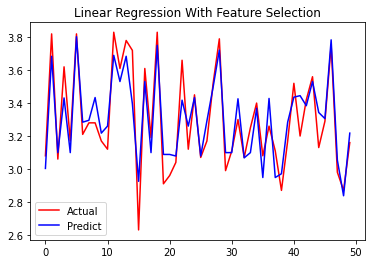

<Figure size 1080x1080 with 0 Axes>

In [ ]:
y_test2 = y_test.reset_index(drop=True)
#print(type(y_test2))
#print(y_test2)
plt.title("Linear Regression With Feature Selection")
plt.plot(y_test2,color='r',label='Actual')
plt.plot(y_pred,color='b',label='Predict')
plt.legend()
plt.figure(figsize=(15,15))
plt.draw()
plt.show()

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))    
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10117144709842309
Root Mean Squared Error: 0.1254343279423168


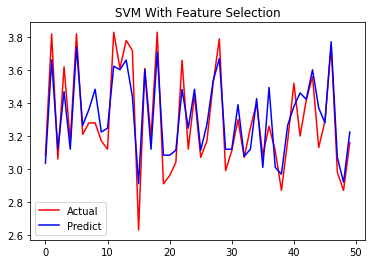

<Figure size 1080x1080 with 0 Axes>

In [ ]:
y_test2 = y_test.reset_index(drop=True)
#print(type(y_test2))
#print(y_test2)
plt.title("SVM With Feature Selection")
plt.plot(y_test2,color='r',label='Actual')
plt.plot(y_pred,color='b',label='Predict')
plt.legend()
plt.figure(figsize=(15,15))
plt.draw()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(1)

model = Sequential()
 
model.add(Dense(42, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=100, verbose=1)
y_pred=model.predict(X_test)

Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 15.7821 - val_loss: 3.3841
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 2.2616 - val_loss: 0.5660
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.8849 - val_loss: 1.6566
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 1.3186 - val_loss: 0.4636
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.3489 - val_loss: 0.2899
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.3561 - val_loss: 0.3274
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.3337 - val_loss: 0.1987
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2419 - val_loss: 0.2277
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2010 - val_loss: 0.1876
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1854 - val_loss: 0.1593
Epoch 11/100
7/7 [========

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(1)

model = Sequential()
 
model.add(Dense(128, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(64,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=996, verbose=1)
y_pred=model.predict(X_test)

Epoch 1/996
7/7 [==============================] - 1s 55ms/step - loss: 14.6416 - val_loss: 4.0790
Epoch 2/996
7/7 [==============================] - 0s 8ms/step - loss: 3.6116 - val_loss: 0.3216
Epoch 3/996
7/7 [==============================] - 0s 8ms/step - loss: 1.6234 - val_loss: 0.1442
Epoch 4/996
7/7 [==============================] - 0s 9ms/step - loss: 1.4169 - val_loss: 0.1143
Epoch 5/996
7/7 [==============================] - 0s 9ms/step - loss: 1.2470 - val_loss: 0.1143
Epoch 6/996
7/7 [==============================] - 0s 9ms/step - loss: 1.3250 - val_loss: 0.2836
Epoch 7/996
7/7 [==============================] - 0s 9ms/step - loss: 1.1005 - val_loss: 0.2321
Epoch 8/996
7/7 [==============================] - 0s 9ms/step - loss: 0.8468 - val_loss: 0.0801
Epoch 9/996
7/7 [==============================] - 0s 8ms/step - loss: 0.9253 - val_loss: 0.0578
Epoch 10/996
7/7 [==============================] - 0s 9ms/step - loss: 0.7476 - val_loss: 0.0699
Epoch 11/996
7/7 [=========

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))    
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11771577625274661
Root Mean Squared Error: 0.16451517423832276


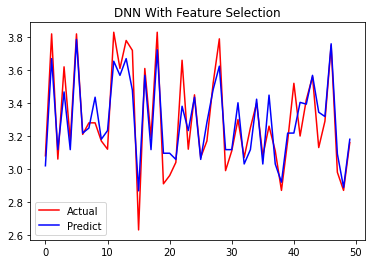

<Figure size 1080x1080 with 0 Axes>

In [ ]:
y_test2 = y_test.reset_index(drop=True)
#print(type(y_test2))
#print(y_test2)
plt.title("DNN With Feature Selection")
plt.plot(y_test2,color='r',label='Actual')
plt.plot(y_pred,color='b',label='Predict')
plt.legend()
plt.figure(figsize=(15,15))
plt.draw()
plt.show()

In [ ]:
num = 87
pdata = X.iloc[[num], :]
pdata.reset_index(drop=True)
#pdata
pdata.shape
#pdata
print(Y[num])
model.predict(pdata)

3.16


array([[3.2064357]], dtype=float32)